In [1]:
# ⬛ 1. Import Library
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model

C:\Users\Conda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(os.getcwd())  # Cek folder kerja sekarang (current working directory)
print(os.listdir('../data'))  # Lihat isi folder data dari folder notebooks

C:\Users\Kedeputian IPSK\trash-classifier\notebooks
['dataset-resized', 'test']


In [3]:
# ⬛ 2. Path Dataset
DATASET_PATH = '../data/dataset-resized'  # ubah jika lokasinya beda

In [4]:
# ⬛ 3. Preprocessing dan Augmentasi
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    horizontal_flip=True,
)

train_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [5]:
# ⬛ 4. Bangun Model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 kelas
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Kedeputian IPSK\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# ⬛ 5. Train Model
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

C:\Users\Kedeputian IPSK\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 466ms/step - accuracy: 0.2177 - loss: 2.3350 - val_accuracy: 0.2704 - val_loss: 1.6434
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 435ms/step - accuracy: 0.4100 - loss: 1.4719 - val_accuracy: 0.3936 - val_loss: 1.4459
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 434ms/step - accuracy: 0.4713 - loss: 1.3098 - val_accuracy: 0.4354 - val_loss: 1.3918
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 29s 448ms/step - accuracy: 0.5190 - loss: 1.2488 - val_accuracy: 0.4473 - val_loss: 1.3640
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 29s 447ms/step - accuracy: 0.5568 - loss: 1.1594 - val_accuracy: 0.4652 - val_loss: 1.3509
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 441ms/step - accuracy: 0.5760 - loss: 1.1278 - val_accuracy: 0.4533 - val_loss: 1.3273
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 432ms/step - accuracy: 0.5808 - loss: 1.0842 - val_accuracy: 0.4612 - val_loss: 1.3219
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 435ms/step - accuracy: 0.6063 - loss: 1.0410 - val_accu

In [7]:
# ⬛ 6. Simpan Model
model.save('../model/trash_cnn_10_epoch.h5')

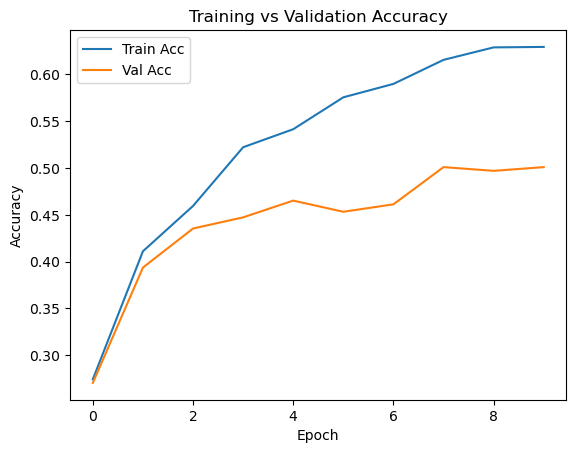

In [8]:
# ⬛ 7. Plot Akurasi
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step
              precision    recall  f1-score   support

   cardboard       0.12      0.07      0.09        80
       glass       0.37      0.22      0.27       100
       metal       0.15      0.23      0.18        82
       paper       0.26      0.42      0.32       118
     plastic       0.10      0.07      0.08        96
       trash       0.00      0.00      0.00        27

    accuracy                           0.21       503
   macro avg       0.17      0.17      0.16       503
weighted avg       0.20      0.21      0.19       503



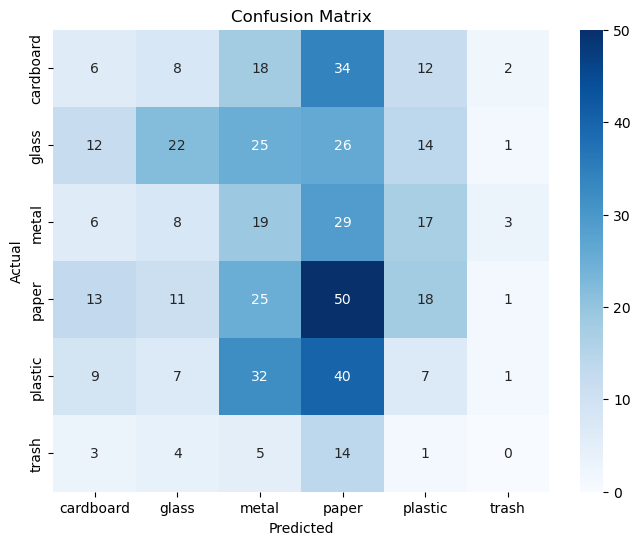

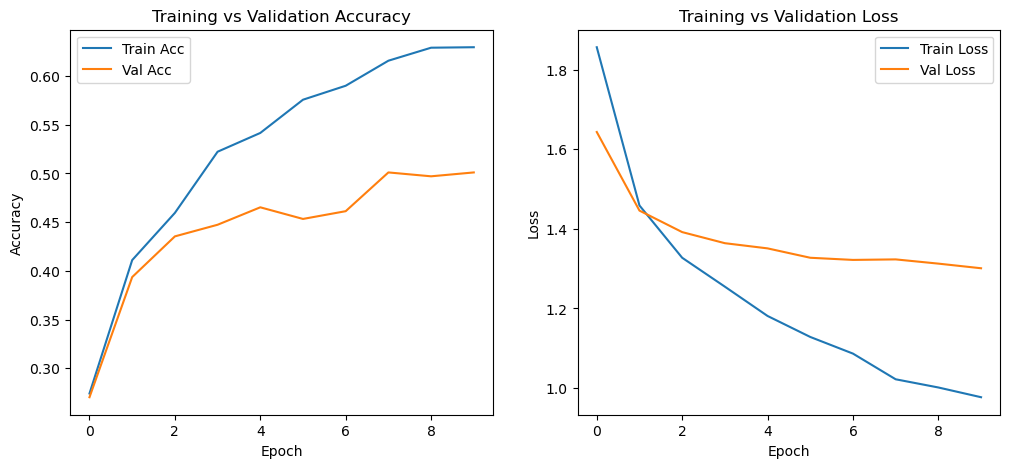

In [9]:
#Evaluasi
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Asumsikan model dan val_gen sudah ada dari training sebelumnya

# 1. Predict label val_gen
val_gen.reset()  # reset generator supaya prediksi dari awal
pred_probs = model.predict(val_gen, verbose=1)
pred_labels = np.argmax(pred_probs, axis=1)

# 2. True labels
true_labels = val_gen.classes

# 3. Label nama kelas (ambil dari generator)
class_names = list(val_gen.class_indices.keys())

# 4. Classification Report
print(classification_report(true_labels, pred_labels, target_names=class_names))

# 5. Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

# 6. Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 7. Plot Training History (accuracy dan loss)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
